In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import style
style.use('fivethirtyeight')

import pandas_datareader.data as web
import datetime as dt

# Getting Data & Data Cleaning

In [2]:
wig = pd.read_csv(r'D:\data\indeksy\wig.csv')
dax = pd.read_csv(r'D:\data\indeksy\dax.csv')
sp500 = pd.read_csv(r'D:\data\indeksy\spx.csv')

In [3]:
wig.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2019-01-02,57494.06,58291.59,57090.34,58290.21,25417940
1,2019-01-03,58055.17,58118.09,57116.19,57192.42,30761455
2,2019-01-04,57489.96,58004.64,57464.86,57947.51,33530663
3,2019-01-07,58270.90,58971.42,58270.90,58971.42,39923428
4,2019-01-08,58884.37,59005.87,58488.32,58906.77,37751792


In [4]:
dax.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2019-01-02,10477.77,10612.72,10386.97,10580.19,88647113
1,2019-01-03,10467.11,10538.66,10400.11,10416.66,94224637
2,2019-01-04,10533.94,10786.34,10483.90,10767.69,107631181
3,2019-01-07,10814.39,10814.47,10681.27,10747.81,79833900
4,2019-01-08,10750.19,10910.71,10745.03,10803.98,103258308


In [5]:
sp500.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2019-01-02,2476.96,2519.49,2467.47,2510.03,637584225
1,2019-01-03,2491.92,2493.14,2443.96,2447.89,762962293
2,2019-01-04,2474.33,2538.07,2474.33,2531.94,774811375
3,2019-01-07,2535.61,2566.16,2524.56,2549.69,692225816
4,2019-01-08,2568.11,2579.82,2547.56,2574.41,662516953


### Change collumns names to english

In [6]:
cols = ['date', 'open', 'high', 'low', 'close', 'volume']

In [7]:
wig.columns = cols
dax.columns = cols
sp500.columns = cols

In [8]:
wig.head()

,date,open,high,low,close,volume
0,2019-01-02,57494.06,58291.59,57090.34,58290.21,25417940
1,2019-01-03,58055.17,58118.09,57116.19,57192.42,30761455
2,2019-01-04,57489.96,58004.64,57464.86,57947.51,33530663
3,2019-01-07,58270.90,58971.42,58270.90,58971.42,39923428
4,2019-01-08,58884.37,59005.87,58488.32,58906.77,37751792


### Set 'date' column to index column

In [9]:
wig.set_index('date', inplace=True)
dax.set_index('date', inplace=True)
sp500.set_index('date', inplace=True)

In [10]:
wig.index = pd.to_datetime(wig.index)
dax.index = pd.to_datetime(dax.index)
sp500.index = pd.to_datetime(sp500.index)

In [11]:
wig.head()

,open,high,low,close,volume
date,,,,,
2019-01-02,57494.06,58291.59,57090.34,58290.21,25417940
2019-01-03,58055.17,58118.09,57116.19,57192.42,30761455
2019-01-04,57489.96,58004.64,57464.86,57947.51,33530663
2019-01-07,58270.90,58971.42,58270.90,58971.42,39923428
2019-01-08,58884.37,59005.87,58488.32,58906.77,37751792


In [12]:
dax.head()


,open,high,low,close,volume
date,,,,,
2019-01-02,10477.77,10612.72,10386.97,10580.19,88647113
2019-01-03,10467.11,10538.66,10400.11,10416.66,94224637
2019-01-04,10533.94,10786.34,10483.90,10767.69,107631181
2019-01-07,10814.39,10814.47,10681.27,10747.81,79833900
2019-01-08,10750.19,10910.71,10745.03,10803.98,103258308


In [13]:
sp500.head()

,open,high,low,close,volume
date,,,,,
2019-01-02,2476.96,2519.49,2467.47,2510.03,637584225
2019-01-03,2491.92,2493.14,2443.96,2447.89,762962293
2019-01-04,2474.33,2538.07,2474.33,2531.94,774811375
2019-01-07,2535.61,2566.16,2524.56,2549.69,692225816
2019-01-08,2568.11,2579.82,2547.56,2574.41,662516953


# Ploting basic statistics

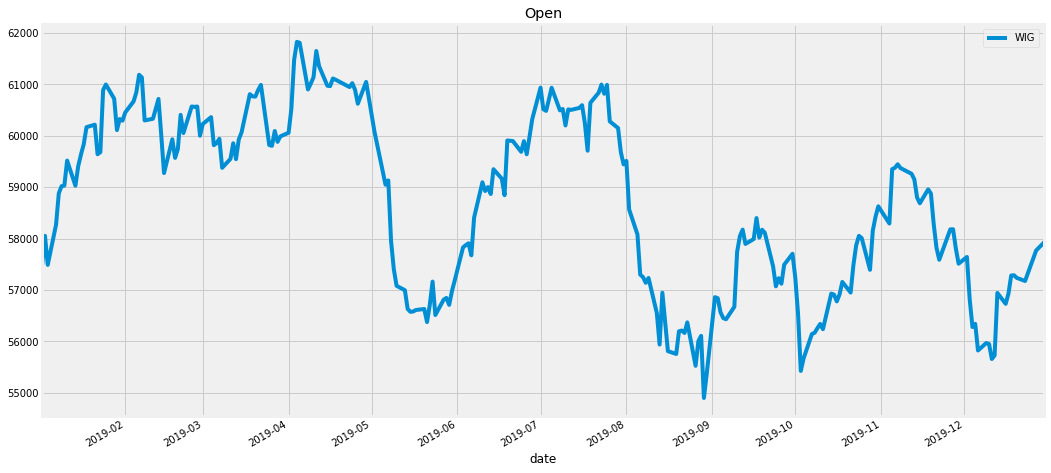

In [14]:
wig['open'].plot(label='WIG', figsize=(16,8), title='Open')

plt.legend()
plt.show()

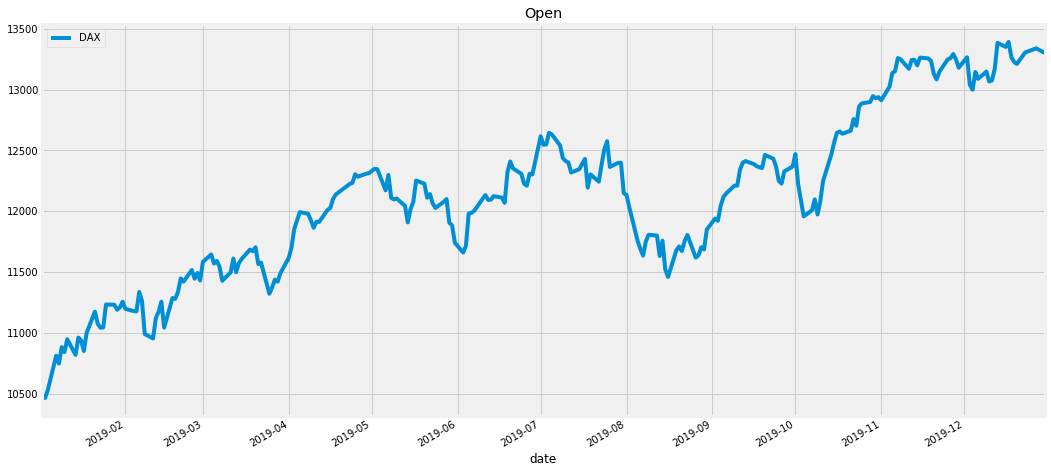

In [15]:
dax['open'].plot(label='DAX', figsize=(16,8), title=('Open'))

plt.legend()
plt.show()

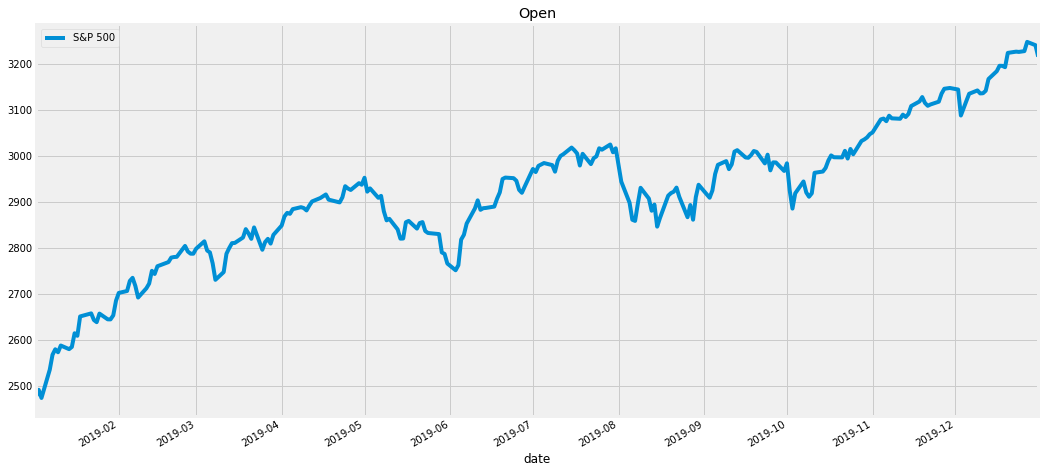

In [16]:
sp500['open'].plot(label='S&P 500', figsize=(16,8), title='Open')

plt.legend()
plt.show()

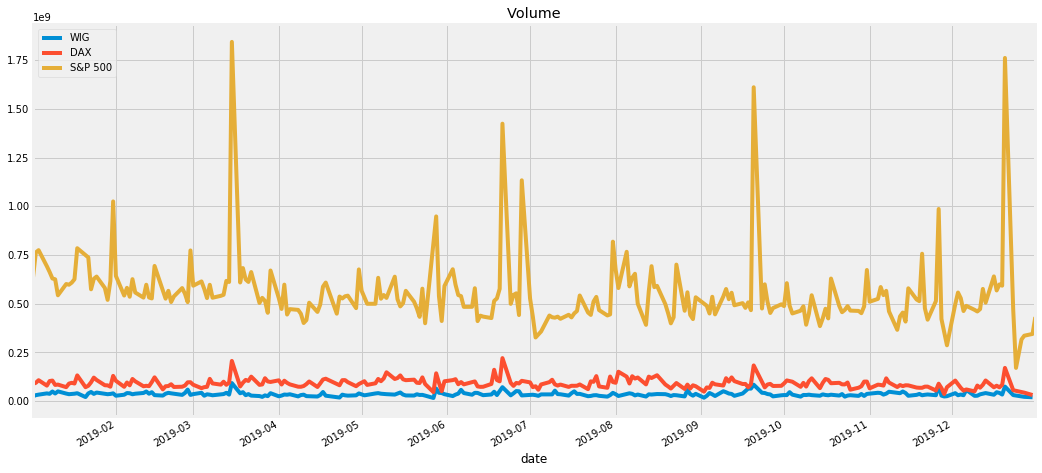

In [17]:
wig['volume'].plot(label='WIG', figsize=(16,8), title='Volume')
dax['volume'].plot(label='DAX')
sp500['volume'].plot(label='S&P 500')

plt.legend()
plt.show()

# Moving Averages

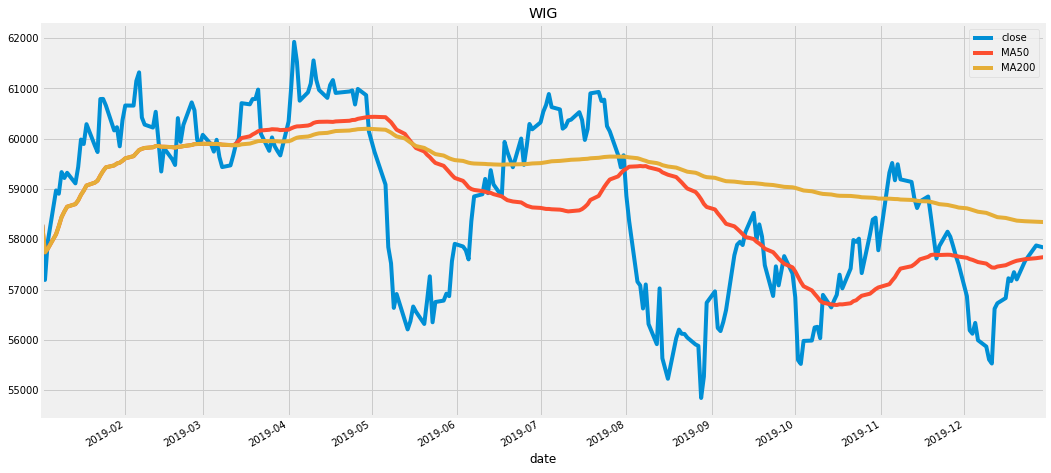

In [18]:
wig['MA50'] = wig['close'].rolling(50, min_periods=0).mean()
wig['MA200'] = wig['close'].rolling(200, min_periods=0).mean()
wig[['close', 'MA50', 'MA200']].plot(title='WIG', figsize=(16,8))

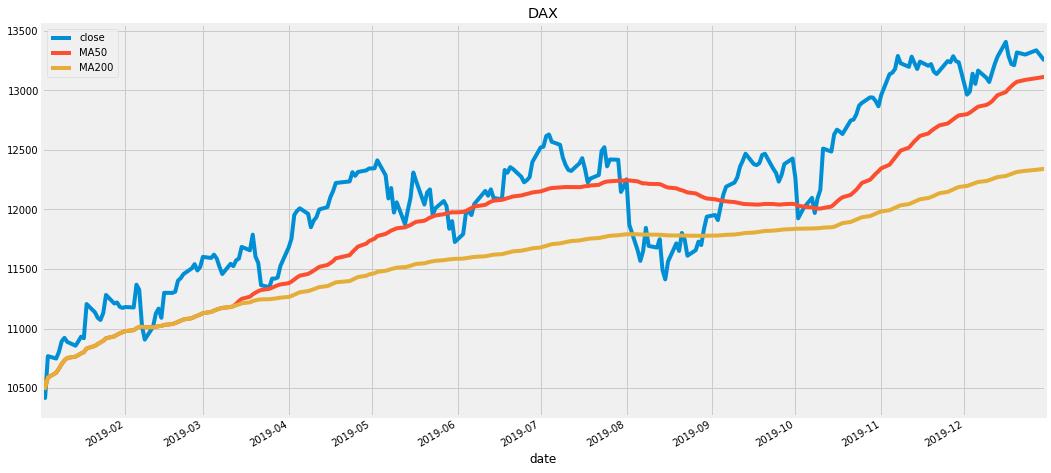

In [19]:
dax['MA50'] = dax['close'].rolling(50, min_periods=0).mean()
dax['MA200'] = dax['close'].rolling(200, min_periods=0).mean()
dax[['close', 'MA50', 'MA200']].plot(title='DAX', figsize=(16,8))

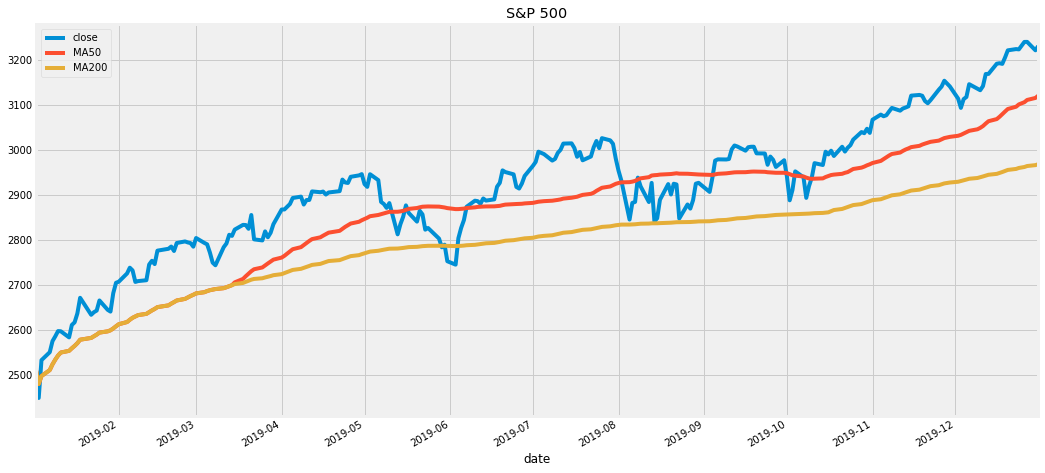

In [20]:
sp500['MA50'] = sp500['close'].rolling(50, min_periods=0).mean()
sp500['MA200'] = sp500['close'].rolling(200, min_periods=0).mean()
sp500[['close', 'MA50', 'MA200']].plot(title='S&P 500', figsize=(16,8))

# Daily Returns

In [21]:
wig['returns'] = wig['close'].pct_change(1)
dax['returns'] = dax['close'].pct_change(1)
sp500['returns'] = sp500['close'].pct_change(1)

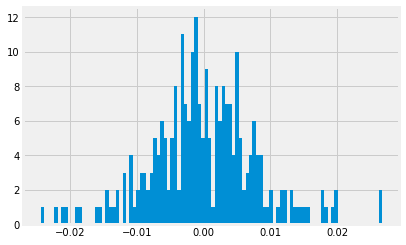

In [22]:
wig['returns'].hist(bins=100)

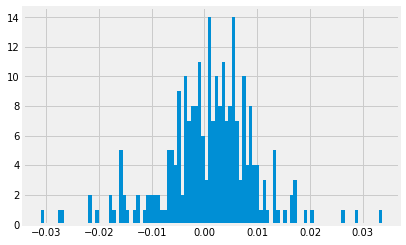

In [23]:
dax['returns'].hist(bins=100)

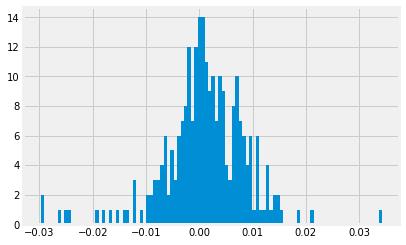

In [24]:
sp500['returns'].hist(bins=100)

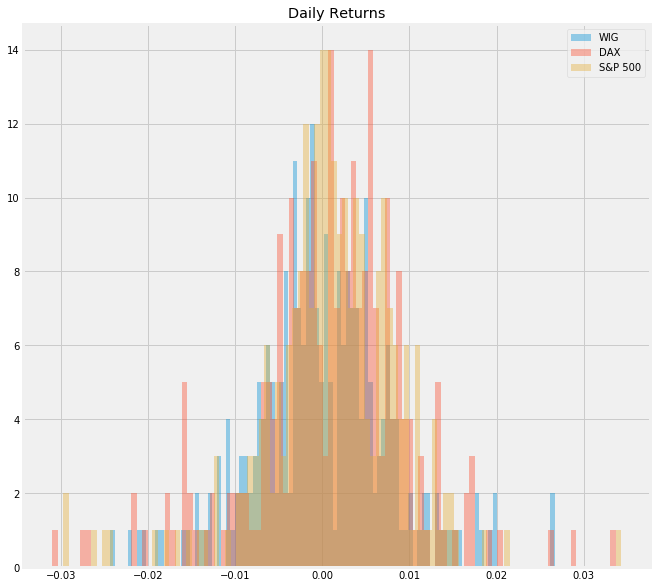

In [25]:
wig['returns'].hist(bins=100, figsize=(10,10), alpha=0.4, label='WIG')
dax['returns'].hist(bins=100, alpha=0.4, label='DAX')
sp500['returns'].hist(bins=100, alpha=0.4, label='S&P 500')

plt.title('Daily Returns')
plt.legend()
plt.show()

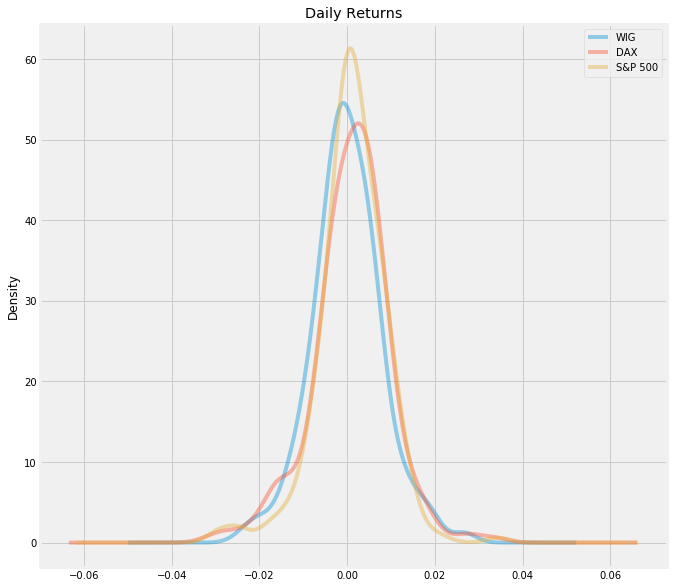

In [26]:
wig['returns'].plot(kind='kde', figsize=(10,10), alpha=0.4, label='WIG')
dax['returns'].plot(kind='kde', alpha=0.4, label='DAX')
sp500['returns'].plot(kind='kde', alpha=0.4, label='S&P 500')

plt.title('Daily Returns')
plt.legend()
plt.show()

In [27]:
box_df = pd.concat([wig['returns'], dax['returns'], sp500['returns']], axis=1)
box_df.columns = ['WIG Returns', 'DAX Returns', 'S&P 500 Returns']

In [28]:
box_df.head()

,WIG Returns,DAX Returns,S&P 500 Returns
date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.018833,-0.015456,-0.024757
2019-01-04,0.013203,0.033699,0.034336
2019-01-07,0.017670,-0.001846,0.007010
2019-01-08,-0.001096,0.005226,0.009695


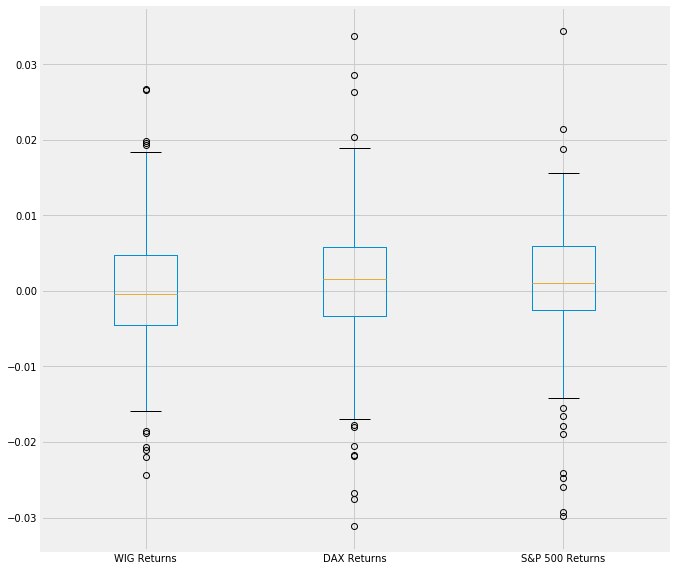

In [29]:
box_df.plot(kind='box', figsize=(10,10))

# Cumulative Returns

In [30]:
wig['cumulative return'] = (1 + wig['returns']).cumprod()
dax['cumulative returns'] = (1 + dax['returns']).cumprod()
sp500['cumuative returns'] = (1 + sp500['returns']).cumprod()

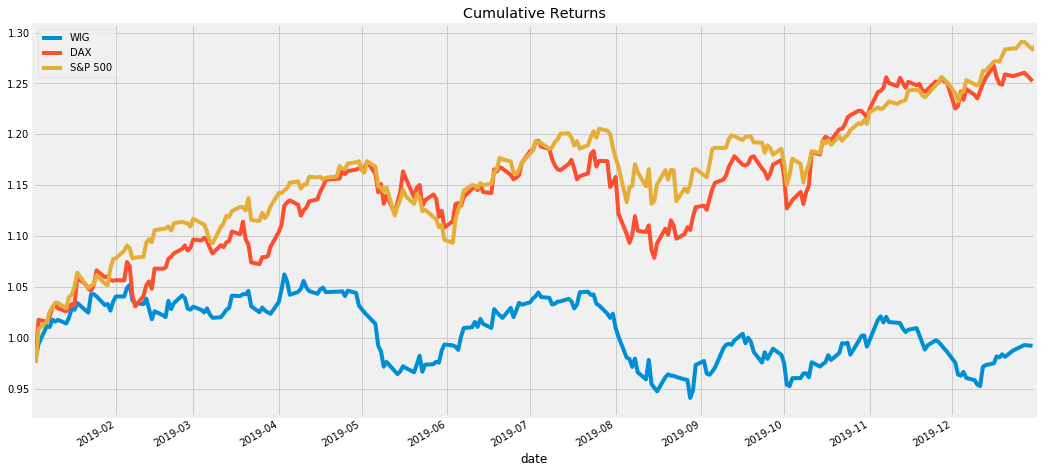

In [31]:
wig['cumulative return'].plot(figsize=(16,8), title=('Cumulative Returns'), label='WIG')
dax['cumulative returns'].plot(label='DAX')
sp500['cumuative returns'].plot(label='S&P 500')

plt.legend()
plt.show()

 - As we can see 2019 was a good year for S&P 500 and DAX. DAX ends the year around 25% profit and S&P 500 almost 30% profit. Those are huge yearly profits.
 - WIG started the year with good profit, still ends the year around 2% loss.